In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# Project 3: Literacy Rate and Life Expectancy

## 1. Introduction
- **Datasets to be used:**
  The following two datasets were extracted from the World Bank's World Development Indicators:

  **1. [Literacy Rate Dataset](https://data.worldbank.org/indicator/SE.ADT.LITR.ZS):** Contains literacy rates (total, male, female) for 217 countries from 1974 to 2023. Here, literacy rate refers specifically to the adult literacy rate, which is the percentage of people ages 15 and above who can both read and write with understanding a short, simple statement about their everyday life. In this analysis, literacy rate is used as an indicator of education levels.
    
  **2. [Life Expectancy Dataset](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=1W):** Includes life expectancy (total, male, female) for the same countries and time period. Similarly, life expectancy in this analysis refers to life expectancy at birth, which indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to remain unchanged throughout its life.

- **Analysis question:**
  
  1. Does higher literacy correlate with longer life expectancy?

  2. Does higher literacy reduce the gender gap in life expectancy?

- **Columns that will (likely) be used:**
  - From the **Literacy Rate Dataset**:
    - `Country Name`  
    - `Year`  
    - `Literacy Rate - Total`  
    - `Literacy Rate - Female`  
    - `Literacy Rate - Male`  

  - From the **Life Expectancy Dataset**:
    - `Country Name`  
    - `Year`  
    - `Life Expectancy - Total`  
    - `Life Expectancy - Female`  
    - `Life Expectancy - Male`

- **Columns to be used to merge/join them:**
  - **Literacy Rate Dataset**: `Country Name`, `Country Code` and `Year`  
  - **Life Expectancy Dataset**: `Country Name`, `Country Code` and `Year`  

- **Hypothesis**:
  
  1. **Countries with higher literacy rates generally have longer life expectancies.** Education promotes healthier lifestyles, such as quitting smoking, exercising regularly, and maintaining a balanced diet, while also improving understanding and access to medical services. 

  2. **In countries with higher literacy rates, the gap in life expectancy between men and women is smaller.** Higher literacy rates are often associated with greater gender equality. This can lead to more equal access to healthcare and similar living conditions for men and women, potentially reducing the gap in life expectancy between genders.

- **Site URL:** [https://computerincontext.readthedocs.io/en/latest/Project3.html]

## 2. Analysisi-1: Does higher literacy correlate with longer life expectancy?

### Objective
To examine the relationship between literacy rate and life expectancy, focusing on whether higher literacy rates are associated with longer life expectancies.

### Step 1: Data Loading
First, the **Life Expectancy Dataset** and **Literacy Rate Dataset** are loaded into dataframes using pandas.

In [12]:
import pandas as pd

life_expectancy_df = pd.read_csv("C:/Users/natsu/OneDrive/Python/Project3/life_expectancy_all.csv")
literacy_rate_df = pd.read_csv("C:/Users/natsu/OneDrive/Python/Project3/literacy_rate_all.csv")

### Step 2: Observing the Dataset Columns 
After loading the datasets, the column names are inspected to understand the structure of the data. This step is essential to identify which columns need to be reshaped or extracted for analysis.

In [14]:
life_expectancy_df.columns

Index(['Country Name', 'Country Code',
       '1974 [YR1974] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1974 [YR1974] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '1974 [YR1974] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '1975 [YR1975] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1975 [YR1975] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '1975 [YR1975] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '1976 [YR1976] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1976 [YR1976] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       ...
       '2020 [YR2020] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '2021 [YR2021] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '2021 [YR2021] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '2021 [Y

In [15]:
literacy_rate_df.columns

Index(['Country Name', 'Country Code',
       '1974 [YR1974] - Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]',
       '1974 [YR1974] - Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]',
       '1974 [YR1974] - Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       '1975 [YR1975] - Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]',
       '1975 [YR1975] - Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]',
       '1975 [YR1975] - Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       '1976 [YR1976] - Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]',
       '1976 [YR1976] - Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]',
       ...
       '2020 [YR2020] - Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       '2021 [

 - The **Life Expectancy Dataset** contains `Country Name`, `Country Code`, and year-specific columns with life expectancy data for `Total`, `Male`, and `Female`.
 - The **Literacy Rate Dataset** also includes `Country Name`, `Country Code`, and year-specific columns for literacy rates (`Total`, `Male`, and `Female`).
 - `Country Name` and `Country Code` will later be used as keys for merging the datasets, while the year-specific columns will be reshaped for analysis.

### Step 3: Reshaping the Data

The original datasets are in a wide format, with each year represented as a separate column. This format is not ideal for analysis, as it makes comparisons across years cumbersome. To address this, the data is reshaped into a long format where the year-specific columns are combined into a single `Year` column.  
I use `pandas.melt()` for this transformation, ensuring that `Country Name` and `Country Code` remain fixed as identifiers. Additionally, I clean up the `Year` column by extracting the numerical values from the column names (e.g., removing `[YR]`). After reshaping the data, I remove any duplicate rows using `drop_duplicates()` to ensure that there is only one unique value for each combination of `Country Name` and `Year`. This step prevents issues such as duplicated records during the merging process and ensures data consistency.
This standardization and deduplication prepare the data for merging and further analysis.

**Code for Life Expectancy Dataset:**

In [18]:
total_life_expectancy_long = life_expectancy_df.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Life Expectancy - Total'
)

total_life_expectancy_long['Year'] = total_life_expectancy_long['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

total_life_expectancy_long = total_life_expectancy_long.drop_duplicates(subset=['Country Name', 'Year'])

total_life_expectancy_long.head()

,Country Name,Country Code,Year,Life Expectancy - Total
0,Afghanistan,AFG,1974,40.397
1,Albania,ALB,1974,70.074
2,Algeria,DZA,1974,46.74
3,American Samoa,ASM,1974,..
4,Andorra,AND,1974,..


**Code for Literacy Rate Dataset:**

In [20]:
total_literacy_rate_long = literacy_rate_df.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Literacy Rate - Total'
)

total_literacy_rate_long['Year'] = total_literacy_rate_long['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

total_literacy_rate_long = total_literacy_rate_long.drop_duplicates(subset=['Country Name', 'Year'])

total_literacy_rate_long.head()

,Country Name,Country Code,Year,Literacy Rate - Total
0,Afghanistan,AFG,1974,..
1,Albania,ALB,1974,..
2,Algeria,DZA,1974,..
3,American Samoa,ASM,1974,..
4,Andorra,AND,1974,..


### Step 4: Merging the Datasets and Handling Missing Values
The reshaped datasets are merged on `Country Name`, `Country Code`, and `Year` to align the literacy rate and life expectancy data.

In [22]:
merged_total = pd.merge(
    total_life_expectancy_long,
    total_literacy_rate_long,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
)

merged_total.head()

,Country Name,Country Code,Year,Life Expectancy - Total,Literacy Rate - Total
0,Afghanistan,AFG,1974,40.397,..
1,Albania,ALB,1974,70.074,..
2,Algeria,DZA,1974,46.74,..
3,American Samoa,ASM,1974,..,..
4,Andorra,AND,1974,..,..


As shown in the tabel above, the dataset contains many missing values (`..`) in the `Life Expectancy - Total` and `Literacy Rate - Total` columns. To ensure accurate analysis and clean visualizations, these missing values are replaced with `NaN` using the `numpy` library (`import numpy as np`). Rows with missing data are then removed to focus only on complete and reliable observations.

In [24]:
import numpy as np

merged_total['Literacy Rate - Total'] = pd.to_numeric(merged_total['Literacy Rate - Total'], errors='coerce')
merged_total['Life Expectancy - Total'] = pd.to_numeric(merged_total['Life Expectancy - Total'], errors='coerce')

merged_total.dropna(subset=['Literacy Rate - Total', 'Life Expectancy - Total'], inplace=True)

merged_total.head()

,Country Name,Country Code,Year,Life Expectancy - Total,Literacy Rate - Total
251,Burkina Faso,BFA,1975,43.676,3.0
258,Central African Republic,CAF,1975,49.223,8.0
327,Kuwait,KWT,1975,70.350,48.0
419,Turkiye,TUR,1975,63.048,45.0
425,United Arab Emirates,ARE,1975,68.035,38.0


### Step 5: Visualizing the Relationship

To explore the relationship between literacy rate and life expectancy, I create a scatter plot using Plotly. The X-axis represents the literacy rate, while the Y-axis represents life expectancy. Each data point corresponds to a country in a specific year. To make the visualization more informative, I color-code the points by `Country Name` and include additional details such as the year and country name in tooltips. This visualization helps identify trends, clusters, or outliers that can provide insights into the relationship between education levels (measured via literacy rate) and health outcomes (measured via life expectancy).

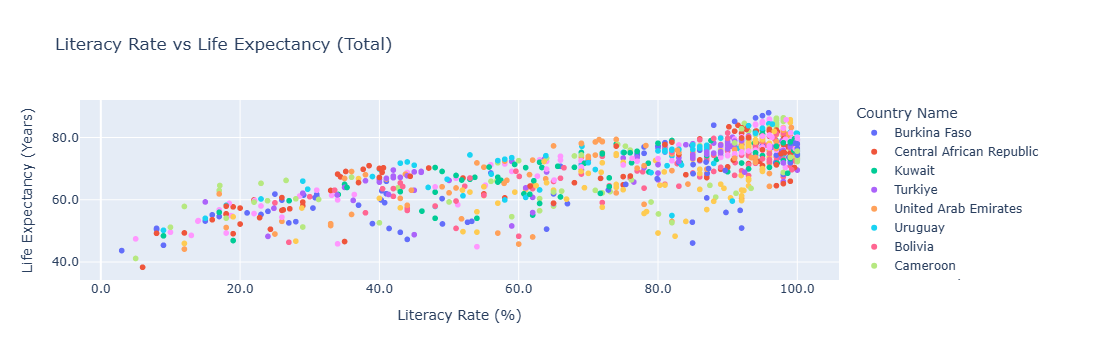

In [26]:
import plotly.express as px

fig = px.scatter(
    merged_total,
    x='Literacy Rate - Total',
    y='Life Expectancy - Total',
    color='Country Name',
    title='Literacy Rate vs Life Expectancy (Total)',
    labels={
        'Literacy Rate - Total': 'Literacy Rate (%)',
        'Life Expectancy - Total': 'Life Expectancy (Years)'
    },
    hover_data=['Country Name', 'Year']
)


fig.update_xaxes(title='Literacy Rate (%)', tickformat=".1f")
fig.update_yaxes(title='Life Expectancy (Years)', tickformat=".1f")


fig.show()

### Step 6: Insights from the Scatter Plot

From the scatter plot aboveIwe can observe a clear positive correlation between literacy rate and life expectancy. Key insights include:

1. **General Trend**:  
   - Countries with higher literacy rates tend to have longer life expectancy. This supports the hypothesis that education, as measured by literacy rates, contributes to better health outcomes.

2. **Clusters**:  
   - Countries with literacy rates below 50% generally have life expectancies between 40 and 60 years.  
   - Conversely, countries with literacy rates above 80% often show life expectancies exceeding 70 years, forming a distinct cluster in the top-right of the graph.

3. **Outliers**:  
   - Some countries deviate from the overall trend. For instance, a few countries with relatively high literacy rates (e.g., above 80%) exhibit unexpectedly low life expectancies. These could be influenced by other factors such as economic disparities, healthcare accessibility, or regional conflicts.

4. **Saturation Point**:  
   - In the range of literacy rates approaching 100%, the life expectancy increase becomes less steep, suggesting a potential diminishing return effect where additional literacy gains have less impact on life expectancy.

This visualization helps highlight the significant role that education plays in shaping health outcomes globally, while also emphasizing the importance of investigating outliers to better understand the exceptions to the trend.

## 3. Analysisi-2: Does higher literacy reduce the gender gap in life expectancy?

### Step 1: Extracting the Top 10 and Bottom 10 Countries by Literacy Rate
To analyze the relationship between literacy rate and gender gap in life expectancy, I start by identifying the top 10 and bottom 10 countries based on their average literacy rates. This categorization helps me compare countries with extreme literacy levels. 
 
Top 10 countries:

In [30]:
high_literacy_countries = merged_total.groupby('Country Name')['Literacy Rate - Total'].mean().nlargest(10).index
high_literacy_countries

Index(['Korea, Dem. People's Rep.', 'Estonia', 'Uzbekistan', 'Azerbaijan',
       'Georgia', 'Latvia', 'Ukraine', 'Armenia', 'Barbados', 'Lithuania'],
      dtype='object', name='Country Name')

Bottom 10 countries:

In [32]:
low_literacy_countries = merged_total.groupby('Country Name')['Literacy Rate - Total'].mean().nsmallest(10).index

low_literacy_countries

Index(['Chad', 'Afghanistan', 'Mali', 'Niger', 'Burkina Faso', 'Guinea',
       'Benin', 'Central African Republic', 'South Sudan', 'Yemen, Rep.'],
      dtype='object', name='Country Name')

### Step 2: Preparing the Female Life Expectancy Data

To focus on **female life expectancy**, I first inspect the column names in the `life_expectancy_df` dataset to identify those relevant to females.

In [34]:
life_expectancy_df.columns

Index(['Country Name', 'Country Code',
       '1974 [YR1974] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1974 [YR1974] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '1974 [YR1974] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '1975 [YR1975] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1975 [YR1975] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '1975 [YR1975] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '1976 [YR1976] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '1976 [YR1976] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       ...
       '2020 [YR2020] - Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       '2021 [YR2021] - Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       '2021 [YR2021] - Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       '2021 [Y

By running `life_expectancy_df.columns`, I observe that the female-specific columns include the string **"life expectancy at birth, female (years)"**. 
Using this information, I filter only the columns related to female life expectancy with the following code:

In [36]:
female_columns = [col for col in life_expectancy_df.columns if 'life expectancy at birth, female (years)' in col.lower()]

Next, I reshape the dataset into a **long format**, where each row represents a specific year. This is achieved using `pandas.melt()`:

In [38]:
female_life_expectancy_long = life_expectancy_df.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=female_columns,
    var_name='Year',
    value_name='Life Expectancy - Female'
)

Finally, the *Year* column, which contains extra text (e.g., `[YR1974]`), is cleaned to extract only the numeric year:

In [40]:
female_life_expectancy_long['Year'] = female_life_expectancy_long['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

At the end of this process, I have a clean, reshaped dataset for **female life expectancy** in a format suitable for analysis.

In [42]:
female_life_expectancy_long.head()

,Country Name,Country Code,Year,Life Expectancy - Female
0,Afghanistan,AFG,1974,40.397
1,Albania,ALB,1974,70.074
2,Algeria,DZA,1974,46.74
3,American Samoa,ASM,1974,..
4,Andorra,AND,1974,..


### Step 3: Preparing the Male Life Expectancy Data
Similarly, male life expectancy data is reshaped.

In [44]:
male_columns = [col for col in life_expectancy_df.columns if 'life expectancy at birth, male (years)' in col.lower()]

male_life_expectancy_long = life_expectancy_df.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=male_columns,
    var_name='Year',
    value_name='Life Expectancy - Male'
)

male_life_expectancy_long['Year'] = male_life_expectancy_long['Year'].str.extract(r'\[YR(\d+)\]').astype(int)

male_life_expectancy_long.head()

,Country Name,Country Code,Year,Life Expectancy - Male
0,Afghanistan,AFG,1974,38.792
1,Albania,ALB,1974,65.55
2,Algeria,DZA,1974,45.372
3,American Samoa,ASM,1974,..
4,Andorra,AND,1974,..


### Step 4: Combining Male and Female Life Expectancy Data
The female and male life expectancy datasets are merged to allow for direct comparison. This combined dataset includes columns for female life expectancy, male life expectancy, and the gender gap (calculated later).

In [46]:
life_expectancy_female_male = pd.merge(
    female_life_expectancy_long,
    male_life_expectancy_long,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
)

life_expectancy_female_male.head()

,Country Name,Country Code,Year,Life Expectancy - Female,Life Expectancy - Male
0,Afghanistan,AFG,1974,40.397,38.792
1,Albania,ALB,1974,70.074,65.55
2,Algeria,DZA,1974,46.74,45.372
3,American Samoa,ASM,1974,..,..
4,Andorra,AND,1974,..,..


### Step 5: Calculating the Gender Gap
The gender gap in life expectancy is calculated by subtracting male life expectancy from female life expectancy. Missing values are removed to ensure clean data.

Before performing mathematical operations, it is crucial to confirm that the columns `Life Expectancy - Female` and `Life Expectancy - Male` are of numeric type. This is achieved using `pd.to_numeric()`. Any non-numeric or invalid values (e.g., missing data) are coerced to `NaN`:

In [48]:
life_expectancy_female_male['Life Expectancy - Female'] = pd.to_numeric(
    life_expectancy_female_male['Life Expectancy - Female'], errors='coerce'
)
life_expectancy_female_male['Life Expectancy - Male'] = pd.to_numeric(
    life_expectancy_female_male['Life Expectancy - Male'], errors='coerce'
)

Then, rows with missing values in either `Life Expectancy - Female` or `Life Expectancy - Male` are dropped using `dropna()` to ensure the calculations are performed only on complete data:

In [50]:
life_expectancy_female_male = life_expectancy_female_male.dropna(subset=['Life Expectancy - Female', 'Life Expectancy - Male'])

Finally, the gender gap is calculated by subtracting the male life expectancy from the female life expectancy for each row in the dataset. The result is stored in a new column, `Gender Gap`:

In [52]:
life_expectancy_female_male['Gender Gap'] = life_expectancy_female_male['Life Expectancy - Female'] - life_expectancy_female_male['Life Expectancy - Male']

life_expectancy_female_male[['Country Name', 'Year', 'Gender Gap']].head()

,Country Name,Year,Gender Gap
0,Afghanistan,1974,1.605
1,Albania,1974,4.524
2,Algeria,1974,1.368
5,Angola,1974,5.570
6,Antigua and Barbuda,1974,5.498


### Step 6: Filtering Data for Selected Countries
The analysis is narrowed to the top 10 and bottom 10 countries by literacy rate. These countries are categorized into two groups: "High Literacy" and "Low Literacy."

In [54]:
selected_scatter_data = life_expectancy_female_male[
    life_expectancy_female_male['Country Name'].isin(low_literacy_countries.union(high_literacy_countries))
].copy()

selected_scatter_data['Group'] = selected_scatter_data['Country Name'].apply(
    lambda country: 'High Literacy' if country in high_literacy_countries else 'Low Literacy'
)

### Step 7: Calculating Group Averages
The average gender gap in life expectancy is calculated for each group (high literacy and low literacy).

In [56]:
grouped_avg = selected_scatter_data.groupby('Group')['Gender Gap'].mean().reset_index()

grouped_avg['Gender Gap'] = grouped_avg['Gender Gap'].round(1)

grouped_avg

,Group,Gender Gap
0,High Literacy,8.2
1,Low Literacy,2.9


### Step 8: Creating the Visualization
A bar chart is created to visualize the average gender gap in life expectancy for the two groups.

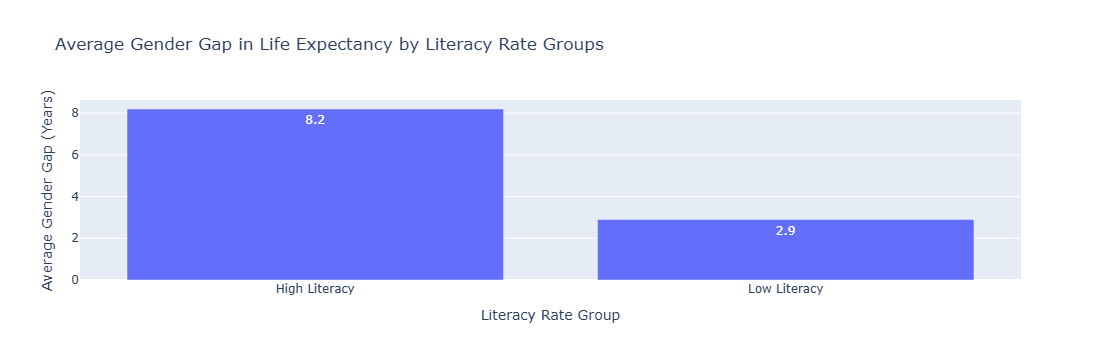

In [58]:
fig = px.bar(
    grouped_avg,
    x='Group',
    y='Gender Gap',
    title='Average Gender Gap in Life Expectancy by Literacy Rate Groups',
    labels={'Group': 'Literacy Rate Group', 'Gender Gap': 'Average Gender Gap (Years)'},
    text='Gender Gap'
)

fig.show()

### Step 9: Insights from the Bar Chart

The bar chart illustrates the average gender gap in life expectancy for countries with the highest and lowest literacy rates. Key insights include:

1. **General Observation**:  
   - Contrary to expectations, countries with higher literacy rates exhibit a larger average gender gap in life expectancy (8.2 years), compared to countries with lower literacy rates (2.9 years).

2. **Possible Explanations**:  
 - **Reasons for a Larger Gender Gap in High Literacy Countries**

   - **Improved Social Status of Women**  
   High literacy rates provide women with better access to education, which helps them gain knowledge about health management and lifestyle habits. As a result, women tend to live longer, leading to a more pronounced gender gap in life expectancy.

   - **Improved Healthcare Services**  
   In countries with high literacy rates, healthcare quality and access are generally better. Particularly, specialized healthcare services for women, such as obstetrics, gynecology, and preventive care, are more developed, leading to better long-term health for women and a higher life expectancy compared to men.

 - **Reasons for a Smaller Gender Gap in Low Literacy Countries**

   - **Lower Overall Healthcare and Living Standards**  
   In countries with low literacy rates, overall living conditions and healthcare services are often inadequate. Women, in particular, are more likely to die young due to insufficient medical care, increased risks during childbirth, or infections. As a result, both men and women tend to have shorter life expectancies, reducing the gender gap.

   - **Harsh Working Conditions**  
   In low literacy countries, living conditions are often harsh, and both men and women are subjected to strenuous labor. These challenging conditions contribute to shorter life expectancy for both genders, leading to a smaller gap between male and female life expectancy.

## 4. Conclusion
In this analysis, I explored the relationship between literacy rates and life expectancy, as well as the impact of literacy rates on the gender gap in life expectancy.

1. **The Relationship Between Literacy and Life Expectancy**:  
   The data shows a clear trend that countries with higher literacy rates tend to have longer life expectancies. This supports the hypothesis that higher literacy leads to better health management and improved access to healthcare, ultimately contributing to longer lifespans.

2. **The Gender Gap in Life Expectancy**:  
   However, in countries with higher literacy rates, I observed a larger gender gap in life expectancy, which contradicts the initial hypothesis that higher literacy would reduce the gender gap. This could be due to women, with better access to education, adopting healthier lifestyles and having better healthcare, leading to longer life expectancy compared to men.

   On the other hand, in countries with lower literacy rates, both men and women tend to have shorter life expectancies, resulting in a smaller gender gap. This may be due to lower overall living standards and healthcare, affecting both genders similarly.

**Limitations and Future Outlook**:  
While this analysis used literacy rates as a proxy for education levels, the data was limited, and many countries had missing values. As a result, it is unclear whether the dataset accurately captures the full scope of education levels across countries. If more comprehensive data were available, the conclusions might differ.

This study highlights the connection between education and health, but it also suggests that other factors, such as economic conditions, healthcare systems, and social inequalities, may play significant roles in shaping life expectancy outcomes. Further research, with more complete data, is needed to deepen our understanding of these complex relationships.